In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator, StatevectorSimulator, QasmSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Create a quantum circuit with 2 qubits (representing magnetic domains' response)
qc = QuantumCircuit(2)



In [3]:
# Step 2: Initialize both qubits in the |0> state (representing the initial unaligned state of magnetic domains)
qc.initialize([1, 0], 0)  # Qubit 0 (magnetic domain 1)
qc.initialize([1, 0], 1)  # Qubit 1 (magnetic domain 2)



In [4]:
# Step 3: Apply a Hadamard gate to both qubits to simulate superposition (representing magnetic domains in an oscillating field)
# This step represents the magnetic domains beginning to respond to the applied AC field
qc.h(0)
qc.h(1)



In [5]:
# Step 4: Apply Pauli-X gates to simulate the in-phase response (representing the real part of AC susceptibility)
# These gates simulate the immediate magnetic response to the applied AC magnetic field
qc.x(0)  # Magnetic domain 1 aligns with the field
qc.x(1)  # Magnetic domain 2 aligns with the field



In [6]:
# Step 5: Apply Phase gates to simulate the out-of-phase response (representing energy losses or magnetic relaxation)
# These phase shifts represent the lagging response of magnetic domains due to frequency dependence
qc.p(np.pi / 4, 0)  # Magnetic domain 1 out-of-phase component
qc.p(np.pi / 6, 1)  # Magnetic domain 2 out-of-phase component



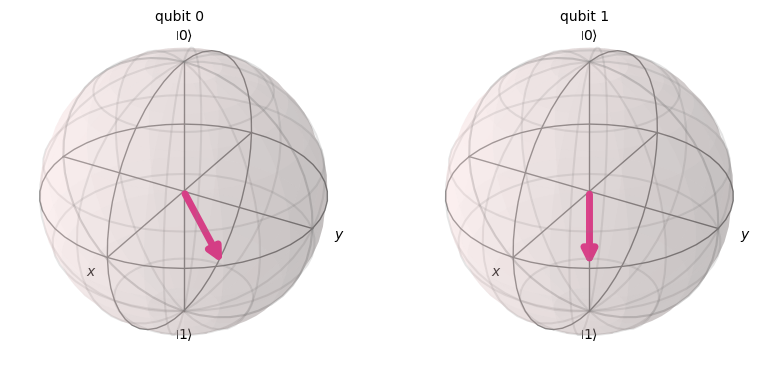

In [7]:
# Step 6: Visualize the qubits' states on the Bloch sphere to observe the magnetic response (in-phase and out-of-phase components)

final_state = StatevectorSimulator().run(qc).result().get_statevector()


plot_bloch_multivector(final_state)



In [8]:
# Step 7: Measure both qubits to observe the final magnetic state (representing the frequency-dependent response of the material)
qc.measure_all()



In [9]:
# Step 8: Simulate the measurement and plot the results
result = QasmSimulator().run(qc,shot =1024).result()
counts = result.get_counts(qc)



Measurement results: {'11': 262, '01': 257, '00': 273, '10': 232}


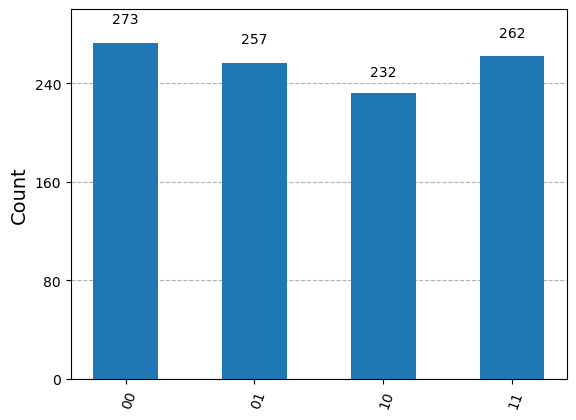

In [10]:
# Print the measurement results and plot the histogram (representing the final magnetic state of the domains)
print(f"Measurement results: {counts}")
plot_histogram(counts)



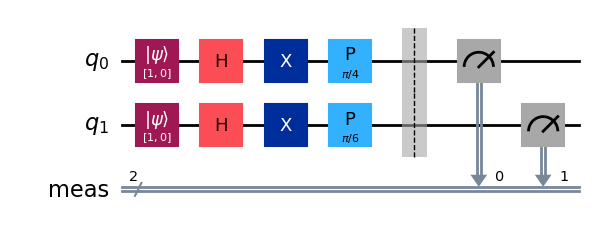

In [11]:
# Draw the quantum circuit
qc.draw(output='mpl')